**One-hot encoding** and **word embeddings** are both techniques used to represent words in a numerical form that can be understood by deep learning algorithms.

**One-hot encoding:** 
* One-hot encoding represents each word as a binary vector with a length equal to the size of the vocabulary, where only one element of the vector is 1 and the rest are 0s, depending on the index of the word in the vocabulary.
* This creates a sparse and high-dimensional vector space where **each word is represented as an independent entity without any information about its relationship with other words.**
* The words “movie” and “film” are interchangeable in most sentences, so the vector that represents “movie” should not be independent to the vector that represents “film”—they should be the same vector, or close enough.

**Word embeddings:** are a way of representing words as vectors of numerical values, **such that words with similar meanings have similar vectors**.
* These vectors are learned by analyzing large amounts of text and determining which words tend to appear together. 
* Words that are used in similar ways in the text are assigned similar vectors, while words that are used differently are assigned different vectors.
* Once you have these vectors, you can use them to perform various natural language processing tasks, such as text classification or language translation.
* Word embeddings are generated by training a neural network on a large corpus of text, which learns to predict the likelihood of a word occurring given its context (i.e., neighboring words). 
* The learned weights of the neural network form the word embeddings. 
* Word embeddings can capture the semantic relationships between words, such as synonyms and antonyms.
* Similar words in a semantic sense have a smaller distance (either Euclidean, cosine or other) between them than words that have no semantic relationship. For example, words like “mom” and “dad” should be closer together than the words “mom” and “ketchup” or “dad” and “butter”.

Word representations obtained from one-hot encoding or hashing are sparse, high-dimensional,and hardcoded. Word embeddings are dense, relatively low-dimensional, and learned from data.

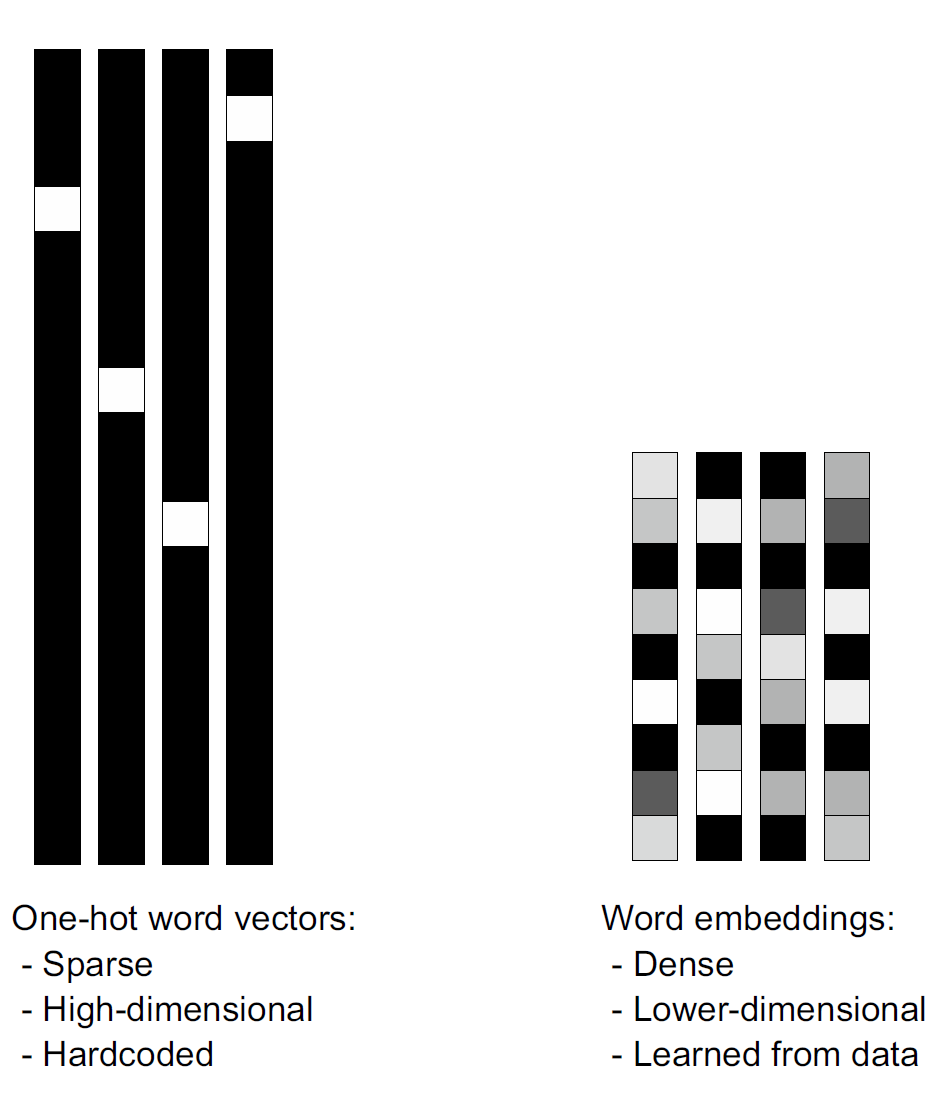

Besides being dense representations, word embeddings are also structured representations, and their structure is learned from data. Similar words get embedded in close locations, and further, specific directions in the embedding space are meaningful.

There are two ways to obtain word embeddings:
* Learn word embeddings jointly with the main task you care about (such as document classification or sentiment prediction). In this setup, you start with random word vectors and then learn word vectors in the same way you learn the weights of a neural network.
* Load into your model word embeddings that were precomputed using a different machine learning task than the one you’re trying to solve. These are called pretrained word embeddings.

####LEARNING WORD EMBEDDINGS WITH THE EMBEDDING LAYER

**Is there some ideal word-embedding space that would perfectly map human language and could be used for any natural language processing task?** <br>

What makes a good word-embedding space depends heavily on
your task: the perfect word-embedding space for an English-language movie-review sentiment-analysis model may look different from the perfect embedding space for an English-language legal-document classification model, because the importance of certain semantic relationships varies from task to task.<br>
It’s thus reasonable to learn a new embedding space with every new task.


In [ ]:
embedding_layer = layers.Embedding(input_dim=max_tokens, output_dim=256) 
#input_dim is the maximum number of tokens (words) in the vocabulary
#output_dim is the size of the embedding vector - for each word in the vocabulary, a vector of size 256 is learned by the embedding layer

output_dim: smaller values like 50 or 100 are used for smaller datasets and larger values like 300 or 500 are used for larger datasets. However, using larger values can also lead to overfitting, and may not necessarily improve performance.

The Embedding layer is best understood as a dictionary that maps integer indices (which stand for specific words) to dense vectors. It takes integers as input, looks up these integers in an internal dictionary, and returns the associated vectors. It’s effectively a dictionary lookup.<br><br>
Word index -> Embedding layer -> Corresponding word vector

When you instantiate an Embedding layer, its weights (its internal dictionary of token vectors) are initially random, just as with any other layer. During training, these word vectors are gradually adjusted, structuring the space into something the downstream model can exploit. Once fully trained, the embedding space will show a lot of structure—a kind of structure specialized for the specific problem for which you’re training your model.

In [ ]:
max_length = 600

inputs = keras.Input(shape=(None,), dtype="int64")
embedded = layers.Embedding(input_dim=max_tokens, output_dim=256)(inputs)
x = layers.LSTM(32)(embedded)
outputs = layers.Dense(1, activation="sigmoid")(x)

model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer="rmsprop",
loss="binary_crossentropy",
metrics=["accuracy"])

In [ ]:
model.fit(int_train_ds, validation_data=int_test_ds, epochs=10)

In [ ]:
import numpy as np
import tensorflow as tf
import keras
from keras import layers

# Toy training data
texts = ["positive text", "negative text", "neutral text", "positive review", "negative review"]
labels = [1, 0, 0, 1, 0]

# Text vectorization layer
max_tokens = 100
text_vectorization = layers.TextVectorization(max_tokens=max_tokens)
text_vectorization.adapt(texts)

# Define the model
embedding_dim = 16
model = keras.Sequential([
    text_vectorization,
    layers.Embedding(input_dim=max_tokens, output_dim=embedding_dim), #new thing
    layers.LSTM(32),
    layers.Dense(1, activation="sigmoid")
])

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
batch_size = 2
epochs = 10
history = model.fit(np.array(texts), np.array(labels), batch_size=batch_size, epochs=epochs)


####USING PRETRAINED WORD EMBEDDINGS

Sometimes you have so little training data available that you can’t use your data alone to learn an appropriate task-specific embedding of your vocabulary.
**What can you do?** - you can load embedding vectors from a precomputed embedding space that you know is highly structured and exhibits useful properties—one that captures generic aspects of language structure.

Examples:
* the Word2Vec algorithm (https://code.google.com/archive/p/word2vec), developed by Tomas Mikolov at Google in 2013.
* Global Vectors for Word Representation (GloVe, https://nlp.stanford.edu/projects/glove), which was developed by Stanford researchers in 2014